# Hypothesis testing and evaluation

## EXERCISE: Comparing mobile behaviour

### Experimental setup

Adapted from http://www.beefissuesquarterly.com/beefissuesquarterly.aspx?id=4078.

*Problem*: Find out whether there is a difference in mobile behaviour between generations.

*Question*: Is there any difference between groups?

*Null hypothesis*: Group means are the same.

### Generate generation data

Imagine we conducted a survey of 200 baby boomers (born 1945-1960), 200 generation xers (born 1961-1980) and 200 millennials (born 1981-1995).

For the purposes of this exercise, let's generate some simulated samples. We assume:
- Boomers send 5 texts per day on average with standard deviation 2;
- GenXers send 12 texts per day on average with standard deviation 3;
- Millennials send 20 texts per day on average with standard deviation 5.

We use `numpy.random.normal` to generate random values from a normal distribution with these parameters

In [1]:
import numpy as np
N = 200
B_mu, B_sigma = 5, 2
X_mu, X_sigma = 12, 3
M_mu, M_sigma = 20, 5
B_data = [int(round(n)) for n in np.random.normal(B_mu, B_sigma, N)]
X_data = [int(round(n)) for n in np.random.normal(X_mu, X_sigma, N)]
M_data = [int(round(n)) for n in np.random.normal(M_mu, M_sigma, N)]

### Visualise generation data

Let's use the `matplotlib.pyplot.hist` function to plot our visualise our three distributions.

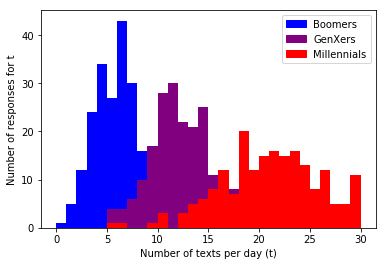

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
start,end,n_bins = 0,30,30
_,_,_ = plt.hist(B_data, bins=n_bins, range=(start,end), color='blue')
_,_,_ = plt.hist(X_data, bins=n_bins, range=(start,end), color='purple')
_,_,_ = plt.hist(M_data, bins=n_bins, range=(start,end), color='red')
_ = plt.legend(handles=[mpatches.Patch(color='blue', label='Boomers'),
                    mpatches.Patch(color='purple', label='GenXers'),
                    mpatches.Patch(color='red', label='Millennials')])
_ = plt.xlabel('Number of texts per day (t)')
_ = plt.ylabel('Number of responses for t')

### TODO Test for differences

- Use one-way analysis of variance (ANOVA) to test whether the sample means are the same.
- Can we reject the null hypothesis at p<0.01?
- Is there a reliable difference in texting behaviour between generations?

In [3]:
from scipy import stats
anova_result = stats.f_oneway(B_data, X_data, M_data)
print(bool(anova_result.pvalue < 0.01))

True


### TODO Check ANOVA assumptions

- Does our data meet the assumptions for a one-way ANOVA?
- Can we reject the null hypothesis using the Kruskall-Wallis H-test?
- Is there a reliable difference in texting behaviour between generations?

In [4]:
# 1 - Our data sets are independent and normal, however, standard deviations are not equal.

# 2 - 
kw_result = stats.kruskal(B_data, X_data, M_data)
print('Can we reject H0?', 'Yes' if kw_result.pvalue<0.01 else 'No')

# 3 - 
print('Is there a reliable difference? Almost certainly..')
print('(There is a {}% chance of falsely obtaining this result)'.format(kw_result.pvalue*100))

Can we reject H0? Yes
Is there a reliable difference? Almost certainly..
(There is a 4.103778739819487e-103% chance of falsely obtaining this result)


### TODO Further generation exercises

Imagine we wanted to compare millennials to generation z (born since 1996). Let's assume this population sends 21 texts per day on average with standard deviation 5.

- Generate a simulated sample Z_data.
- What test should we use?
- Is there a reliable difference in texting behaviour between millennials and generation Z?

In [5]:
# 1 - 
Z_mu, Z_sigma = 21, 5
Z_data = [int(round(n)) for n in np.random.normal(Z_mu, Z_sigma, N)]

# 2 - Either will work since standard deviations are equal.

# 3 - 
mz_anova_result = stats.f_oneway(M_data, Z_data)
print('Is there a reliable difference?',
      'Yes' if mz_anova_result.pvalue<0.01 else 'No',
      '(p={:.3f})'.format(mz_anova_result.pvalue))

Is there a reliable difference? No (p=0.764)


## *STOP PLEASE. THE FOLLOWING IS FOR THE NEXT EXERCISE. THANKS.*

## EXERCISE: Comparing layouts

### Experimental setup

*Problem*: Find out which version of a display is better.

*Question*: Do users prefer grid view?

*Null hypothesis*: Users do not prefer grid view.

### Create ratings data

We assume different subject groups for each conditions. Each subject sees one of the layouts and is asked to rate on a 5-point Likert scale how strongly the agree or disagree with the statement:

> Page gives a good overview.
> 
> 1=strongly agree; 2=agree; 3=neutral; 4=disagree; 5=strongly disagree

G_data corresponds to ratings from users that see the grid view. L_data corresponds to ratings from users that see the list view.

In [6]:
G_data = [1, 3, 3, 2, 4, 2, 3, 3, 1, 5, 2, 3, 4, 2, 1, 3, 2, 2, 1, 3,
          2, 3, 4, 2, 1, 3, 2, 2, 1, 3, 1, 3, 3, 2, 4, 2, 3, 3, 1, 5]
L_data = [4, 5, 2, 4, 4, 3, 5, 4, 3, 5, 1, 4, 5, 3, 4, 4, 2, 3, 4, 5,
          1, 4, 5, 3, 4, 4, 2, 3, 4, 5, 4, 5, 2, 4, 4, 3, 5, 4, 3, 5]
print('Grid median:', np.median(G_data))
print('List median:', np.median(L_data))

Grid median: 2.5
List median: 4.0


### Visualise ratings data

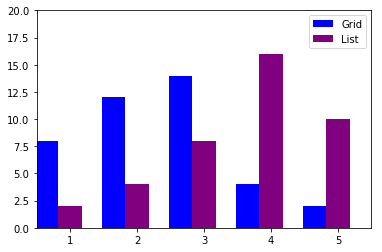

In [7]:
%matplotlib inline
from collections import Counter
import matplotlib.pyplot as plt

def count(data):
    c = Counter(data)
    return list(c.keys()), list(c.values())

G_bins, G_freqs = count(G_data)
L_bins, L_freqs = count(L_data)
bar_width = 0.35

_ = plt.bar([b-bar_width for b in G_bins], G_freqs, bar_width, color='blue', label='Grid')
_ = plt.bar(L_bins, L_freqs, bar_width, color='purple', label='List')

plt.xlim(0.5, 5.5)
plt.ylim(0,20)
_ = plt.legend()

### TODO Test whether grid is preferred

- Can we reject the null hypothesis at p<0.01 using the Mann-Whitney U test?
- Do users prefer grid view?

In [8]:
# 1 -
mwu_result = stats.mannwhitneyu(G_data, L_data)
print('Can we reject H0?', 'Yes' if mwu_result.pvalue<0.01 else 'No')

# 2 -
print('Is there a reliable difference?',
      'Yes' if mwu_result.pvalue<0.01 else 'No',
      '(p={:.6f})'.format(mwu_result.pvalue))

Can we reject H0? Yes
Is there a reliable difference? Yes (p=0.000005)


### TODO p-hacking example

Imagine we instead measured average montly spend. Let's assume a sample of 1000 grid users spend \$155 on average with standard deviation 40, and a sample of 1000 list users spend \$150 on average with standard deviation 40.

In [12]:
import numpy as np
N = 1000
G_mu, G_sigma = 155, 40
L_mu, L_sigma = 150, 40

def run_experiment():
    G_spend = np.random.normal(G_mu, G_sigma, N)
    L_spend = np.random.normal(L_mu, L_sigma, N)
    return stats.ttest_ind(G_spend, L_spend).pvalue*0.5 # one-tailed for testing G_mu > L_mu

- Run 1000 experiments
- For what percentage of experiments do we fail to reject the null hypothesis at 0.05?
- Do your neighbours get the same percentage?
- How can we avoid false rejections?

In [13]:
# 1 - 
NUM_EXPTS = 10000
pvalues = [run_experiment() for _ in range(NUM_EXPTS)]

# 2 -
ALPHA = 0.05
print('We fail to reject H0 {:.0f}% of the time.'.format(100*sum([1 if p>ALPHA else 0 for p in pvalues])/NUM_EXPTS))

# 3 - You can also run multiple times. The result varies with different samples even though it's generated from the same population!

# 4 - Try increasing N above to 10000.

We fail to reject H0 12% of the time.


## *STOP PLEASE. THE FOLLOWING IS FOR THE NEXT EXERCISE. THANKS.*

## EXERCISE: Comparing classifiers

### Experimental setup

*Problem*: Determine which classifer is better.

*Question*: Is my shiny, new model better?

*Null hypothesis*: The new model is not better.

### Generate gold and classifier labellings

We generate 10,000 gold labels, marking a approximately 20% as spam (1) based on a random number generator and the rest as ham (0).

In [15]:
import random
random.random()
N = 10000
GOLD_PCT_SPAM = 0.2
Y_gold = [int(random.random()<GOLD_PCT_SPAM) for _ in range(N)]

We generate two system labellings by ranodomly flipping gold labels assuming:
- System 1 incorrectly marks 5% of ham as spam and fails to detect 20% of actual spam,
- System 2 incorrectly marks 10% of ham as spam and fails to detect 10% of actual spam.

In [16]:
SYS1_ERROR_RATES = {
    0: 0.05,  # spurious: sys1 incorrectly marks 5% of ham as spam
    1: 0.2,   # misses: sys1 fails to detect 20% of spam
}
SYS2_ERROR_RATES = {
    0: 0.1,  # spurious: sys2 incorrectly marks 10% of ham as spam
    1: 0.1   # misses: sys2 fails to detect 10% of spam
}

def simulate_predictions(Yg, error_rates):
    for y in Yg:
        if random.random()<error_rates[y]:
            yield 1-y
        else:
            yield y

Y_sys1 = list(simulate_predictions(Y_gold, SYS1_ERROR_RATES))
Y_sys2 = list(simulate_predictions(Y_gold, SYS2_ERROR_RATES))

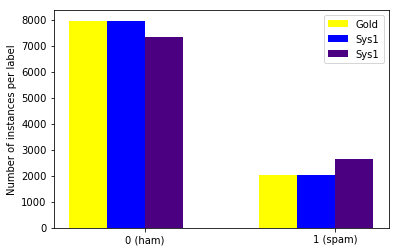

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
from collections import Counter

def class_distr(Y):
    return zip(*sorted(Counter(Y).items()))

gold_classes, gold_freqs = class_distr(Y_gold)
sys1_classes, sys1_freqs = class_distr(Y_sys1)
sys2_classes, sys2_freqs = class_distr(Y_sys2)

bar_width = 0.2

_ = plt.bar([b-(1.5*bar_width) for b in gold_classes], gold_freqs, bar_width, color='yellow', label='Gold')
_ = plt.bar([b-(0.5*bar_width) for b in sys1_classes], sys1_freqs, bar_width, color='blue', label='Sys1')
_ = plt.bar([b+(0.5*bar_width) for b in sys2_classes], sys2_freqs, bar_width, color='indigo', label='Sys1')

plt.xticks([0,1], ['0 (ham)', '1 (spam)'])
plt.ylabel('Number of instances per label')

_ = plt.legend()

### Split data into folds

In [18]:
import numpy as np
NUM_FOLDS = 10
Y_gold_folds = np.array_split(Y_gold, NUM_FOLDS)
Y_sys1_folds = np.array_split(Y_sys1, NUM_FOLDS)
Y_sys2_folds = np.array_split(Y_sys2, NUM_FOLDS)

### TODO Calculating classifier accuracy

- Calculate accuracy and f1 scores on first fold.
- Which system has higher accuracy?
- Which system has higher f1 score?
- Which measure has better sensitivity for comparisons?
- Which measure would you rather report?

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

PRF_KWARGS = {
    'pos_label': 1,     # 1 is the positive spam label
    'average': 'binary' # evaluate p/r/f of the positive label
}

Yg0 = Y_gold_folds[0]
Y10 = Y_sys1_folds[0] 
Y20 = Y_sys2_folds[0]

print("System 1 accuracy:", accuracy_score(Yg0, Y10))
print("System 2 accuracy:", accuracy_score(Yg0, Y20))
print("System 1 f1 score:", f1_score(Yg0, Y10, **PRF_KWARGS))
print("System 2 f1 score:", f1_score(Yg0, Y20, **PRF_KWARGS))

System 1 accuracy: 0.917
System 2 accuracy: 0.889
System 1 f1 score: 0.798053527981
System 2 f1 score: 0.776659959759


- Calculate precision and recall scores on first fold.
- Which system has higher precision?
- Which system has higher recall?
- Formulate precision and recall in terms GOLD_PCT_SPAM, SPURIOUS_ERROR_RATE and MISSED_ERROR_RATE
- Are precision and recall values as expected?

In [20]:
# 1 - 
s1p = precision_score(Yg0, Y10, **PRF_KWARGS)
s1r = recall_score(Yg0, Y10, **PRF_KWARGS)
print("System 1 precision / recall: {:.3f} / {:.3f}".format(s1p, s1r))
s2p = precision_score(Yg0, Y20, **PRF_KWARGS)
s2r = recall_score(Yg0, Y20, **PRF_KWARGS)
print("System 2 precision / recall: {:.3f} / {:.3f}".format(s2p, s2r))

# 2 - 
print('Which system has higher precision?', 'System 1' if s1p>s2p else 'System 2')

# 3 - 
print('Which system has higher recall?', 'System 1' if s1r>s2r else 'System 2')

# 4 - 
def p_and_r(gold_pct_spam, error_rates):
    spurious_error_rate = error_rates[0]
    missed_error_rate = error_rates[1]
    tp = gold_pct_spam*(1-missed_error_rate)
    fp = spurious_error_rate*(1-gold_pct_spam)
    precision = tp/(fp+tp)
    recall = tp/gold_pct_spam
    return precision, recall
print("System 1: {:.3f} / {:.3f}".format(*p_and_r(GOLD_PCT_SPAM, SYS1_ERROR_RATES)))
print("System 2: {:.3f} / {:.3f}".format(*p_and_r(GOLD_PCT_SPAM, SYS2_ERROR_RATES)))

# 5 - Close, closer with higher N (e.g., 1,000,000)

System 1 precision / recall: 0.800 / 0.796
System 2 precision / recall: 0.663 / 0.937
Which system has higher precision? System 1
Which system has higher recall? System 2
System 1: 0.800 / 0.800
System 2: 0.692 / 0.900


### TODO Calculate accuracy score across folds

- Calculate accuracy across folds
- Compare mean and standard deviation

In [21]:
def score_folds(Ygf, Ysf, scorer, **kwargs):
    for Yg, Ys in zip(Ygf, Ysf):
        yield scorer(Yg, Ys, **kwargs)
        
Y_sys1_accuracy = list(score_folds(Y_gold_folds, Y_sys1_folds, accuracy_score))
Y_sys2_accuracy = list(score_folds(Y_gold_folds, Y_sys2_folds, accuracy_score))

print("System 1 mu, sigma:", np.mean(Y_sys1_accuracy), np.std(Y_sys1_accuracy))
print("System 2 mu, sigma:", np.mean(Y_sys2_accuracy), np.std(Y_sys2_accuracy))


System 1 mu, sigma: 0.9176 0.00678527818147
System 2 mu, sigma: 0.8983 0.0138423263941


- Calculate f1_score across folds
- Compare mean and standard deviation

In [ ]:
Y_sys1_f1 = list(score_folds(Y_gold_folds, Y_sys1_folds, f1_score, **PRF_KWARGS))
Y_sys2_f1 = list(score_folds(Y_gold_folds, Y_sys2_folds, f1_score, **PRF_KWARGS))

print("System 1 mu, sigma:", np.mean(Y_sys1_f1), np.std(Y_sys1_f1))
print("System 2 mu, sigma:", np.mean(Y_sys2_f1), np.std(Y_sys2_f1))

### TODO Compute signficance for H1 sys1 > sys2

- Calculate one-sided paired t-test for accuracy and f1 score
- How do your average scores compare to your neighbours (or across multiple runs)?
- How do your p-values compare to your neighbours (or across multiple runs)?
- Would you expect this variation in a real experiment?
- What does this variation say about reliability of experiments?
- How can we increase reliability?

In [22]:
def ttest_across_folds(Ygf, Y1f, Y2f, scorer, **kwargs):
    sys1_scores = list(score_folds(Ygf, Y1f, scorer, **kwargs))
    sys2_scores = list(score_folds(Ygf, Y2f, scorer, **kwargs))
    print("P-value for H1 sys1 (mu={:.3f}) > sys2 (mu={:.3f}) by {}:"\
          .format(np.mean(sys1_scores), np.mean(sys2_scores), scorer.__name__))
    print(stats.ttest_rel(sys1_scores, sys2_scores).pvalue*0.5)

# 1 - 
ttest_across_folds(Y_gold_folds, Y_sys1_folds, Y_sys2_folds, accuracy_score)
ttest_across_folds(Y_gold_folds, Y_sys1_folds, Y_sys2_folds, f1_score, **PRF_KWARGS)

# 2 - Average scores change across multiple data samples even though it's generated from the same population!

# 3 - P-values don't change on the same data. They do change across different data samples.

# 4 - Average scores should only change if the sample is not fixed, or if folds are sampled randomly.

# 5 - The variation highlights the fact that we always need to be careful generalising results to unseen data.
#     It also highlights the importance of selecting samples that are representative of the population.

# 6 - Significance testing helps us quantify reliability. Larger sample sizes help ensure reliability.

P-value for H1 sys1 (mu=0.918) > sys2 (mu=0.898) by accuracy_score:
0.00205208756653
P-value for H1 sys1 (mu=0.797) > sys2 (mu=0.783) by f1_score:
0.0841094260981


## *STOP PLEASE. THE FOLLOWING IS FOR THE NEXT EXERCISE. THANKS.*

## EXERCISE: Confidence intervals

[Adapted from Data Science from Scratch pages 183-184 and http://people.duke.edu/~ccc14/pcfb/analysis.html.]

Imagine we want to quantify the variance of the mean score within a sample but we can't or don't want to run our classifier multiple times. We can use bootstrap resampling to do this.

### Generate non-normal data

First let's generate some data according to a beta distribution with a=8 and b=2.

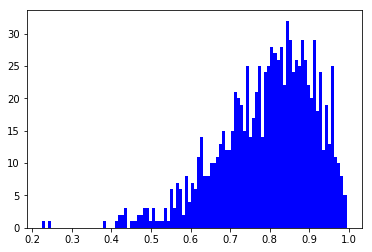

In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
N = 1000
a = 8
b = 2
D = [np.random.beta(a, b) for _ in range(N)]
_, _, _ = plt.hist(D, bins=100, color='blue')

### Bootstrapping a statistic

We define functions to randomly sample elements with replacement and to apply a statistic funcion over these samples many times. 

Note: Please be patient. This takes a little bit of time.

In [24]:
S = 100

def bootstrap_sample(data):
    return [np.random.choice(data) for _ in data]

def bootstrap_statistic(data, stats_fn, num_samples):
    return [stats_fn(bootstrap_sample(data)) for _ in range(num_samples)]

bs_mean = bootstrap_statistic(D, np.mean, S)
print(bs_mean[:5])

[0.79314046280219508, 0.79516947876317479, 0.79629322685252646, 0.80184530407095644, 0.79682251343769095]


### Computing the confidence interval

Finally we define a function to compute the confidence interval at a given level. For the `level` parameter, 0.05 corresponds to a 95% confidence interval.

In [25]:
def bootstrap_ci(stats, level):
    lower_percentile = 0.5*level
    upper_percentile = 100 - 0.5*level
    return np.percentile(stats, lower_percentile), np.percentile(stats, upper_percentile)

lb, ub = bootstrap_ci(bs_mean, 0.05)

print('{:.3f} [{:.3f},{:.3f}]'.format(np.mean(D), lb, ub))

0.794 [0.782,0.802]


- Bootstrap median statistic and calculate confidence interval
- Discussion: When are confidence intervals better than standard deviation?
- Discussion: When could we use a bootstrap CI?

In [26]:
# 1 - 
bs_median = bootstrap_statistic(D, np.median, S)
print(bs_median[:5])
lb_median, ub_median = bootstrap_ci(bs_median, 0.05)
print('{:.3f} [{:.3f},{:.3f}]'.format(np.median(D), lb_median, ub_median))

# 2 - From Frost. Understanding Hypothesis Tests: Confidence Intervals and Confidence Levels..
#     http://blog.minitab.com/blog/adventures-in-statistics/understanding-hypothesis-tests%3A-confidence-intervals-and-confidence-levels
#     Confidence intervals serve as good estimates of the population parameter because the procedure tends to produce 
#     intervals that contain the parameter. Confidence intervals are comprised of the point estimate (the most likely 
#     value) and a margin of error around that point estimate. The margin of error indicates the amount of uncertainty 
#     that surrounds the sample estimate of the population parameter.
#     In this vein, you can use confidence intervals to assess the precision of the sample estimate. For a specific 
#     variable, a narrower confidence interval [90 110] suggests a more precise estimate of the population parameter 
#     than a wider confidence interval [50 150].

# 3 - The bootstrap is a general, nonparametric procedure for calculating CIs.

[0.80864716411849447, 0.81874920841335019, 0.81021449153375369, 0.81415108430811856, 0.82096647326415417]
0.813 [0.803,0.823]
